# Machine Learning

## HSE, 2024-25

### Home Assignment #2. Mathematical Optimization


Assignment completed by:

    Talgat Zharkynbay

### General Information

__Publication date:__ 20.04.2025

__Deadline:__ 04:00 30.04.2025

### Grading and Penalties

The number of points for each problem in this homework assignment is indicated next to the problem statement.

The grade for the homework assignment is calculated using the following formula:

$$
s \times 10/34 ,
$$

where $ s $ is the number of points you scored in total for all problems.

A late submission penalty of 1 **secondary** point per day is applied to the final grade for the assignment, but the delay cannot exceed one week.

**Important:** This homework assignment includes several problems for which you can earn bonus points. Bonus points are added to the regular points, and it may turn out that your final grade exceeds 10. In this case, that will be your grade. Therefore, it is **possible** to score more than 10 for this assignment.

__Attention!__ Homework assignments must be completed independently. "Similar" solutions are considered plagiarism, and all involved students (including those from whom the work was copied) will receive no more than 0 points for the assignment.

Additionally, please remember that all solutions are run through a special new anti-plagiarism system for Jupyter notebooks, which detects cross-similarities between different notebooks, as well as solutions generated by neural networks. Such work will also be strictly considered as plagiarism.

### Submission Format

You upload your solution using the link provided in the telegram channel. You need to upload a file with the extension .ipynb (Python notebook)

### About the Assignment

In this assignment, we will practice working with mathematical analysis and optimization methods, a clear understanding of which is absolutely necessary for any task and model in machine learning.

In the first part of the assignment, we will work with the following function:

$$y(x) = x^{3} \ln(x)$$

### Task 1


#### 1.1. (1 point)

Calculate the derivative of this function analytically. To do this, either use a sheet of paper and attach a photo here, or use LaTeX markup language, which is supported in Jupyter notebooks.

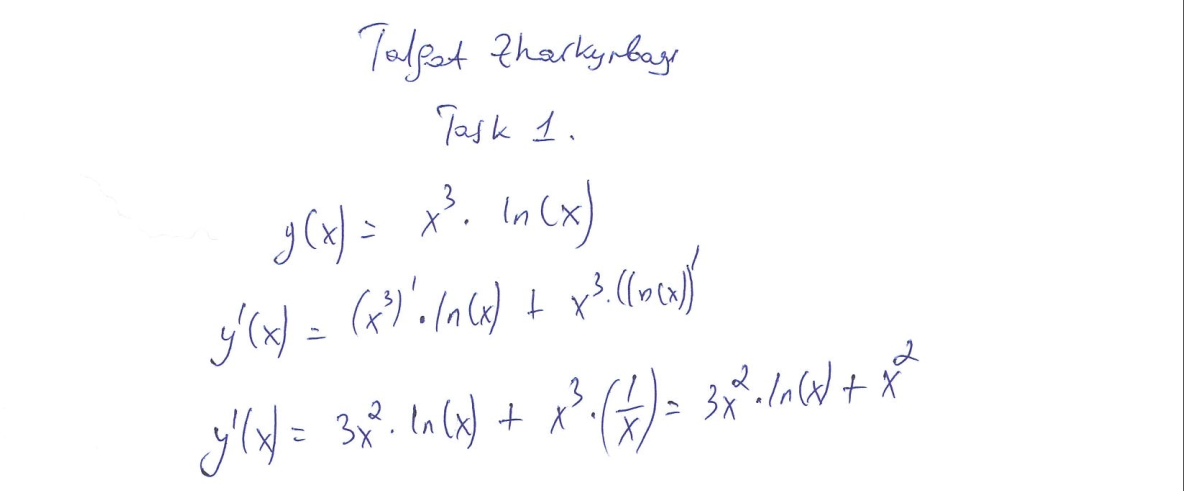

In [1]:
from IPython.display import Image
Image(filename='Y:\DFS_Zharkynbay\Calls\To read\Task1.png')

#### 1.2. (2 points)

Write a program function `f(x)` that would compute the value of our function at a given point and return this value as the answer; and write a program function `df(x)` that would compute the value of the derivative of our function at a given point and return this value as the answer.

Be sure to test all functions at a specific point. Ensure that the answers from your previous section (on paper) and the program in this section match completely.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings 
warnings.filterwarnings('ignore')

In [3]:
def f(x):
    return (x ** 3) * np.log(x)

def df(x):
    return 3 * (x ** 2) * np.log(x) + x ** 2

In [4]:
# Testing
f(1), df(1)

(0.0, 1.0)

#### 1.3. (2 points)

Visualize our function (plot the graph).


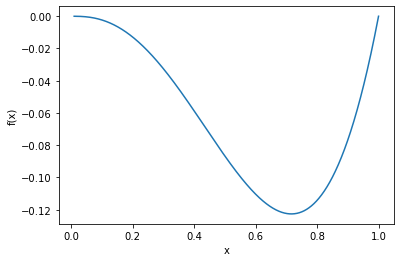

In [5]:
x = np.linspace(0.01, 1, 1000)
ax = sns.lineplot(y = f(x), x = x)
ax.set(xlabel='x', ylabel='f(x)')
plt.show()

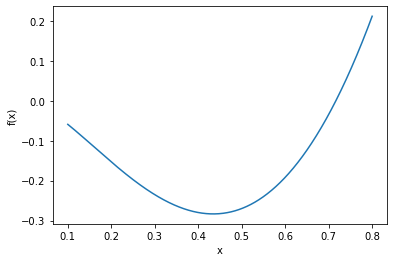

In [6]:
x = np.linspace(0.1, 0.8, 1000)
ax = sns.lineplot(y = df(x), x = x)
ax.set(xlabel='x', ylabel='f(x)')
plt.show()

### Task 2

#### 2.1. (4 points)

Implement the function `get_min_with_gd` that takes the initial point $x_0$, the number of steps, `lr` (learning rate), and `threshold`; performs gradient descent to find the minimum; and returns the sequence of points obtained at each step.

In [7]:
def get_min_with_gd(x0, func_grad, lr=0.1, threshold=0.001, n_iter=150):
    history = [x0]

    for i in tqdm(range(n_iter)):
      w = history[-1]
      grad = func_grad(w)
      norm = np.linalg.norm(grad)
      w_new = w - lr * grad / norm
      # print(w, grad, norm, w_new)
      history.append(w_new)

    return history

#### 2.2. (2 points)

Run the search for the minimum from several arbitrary points (at least 3).

Check that everything works as expected by plotting the graph of the coordinate of the point as a function of the iteration of gradient descent for each run.

In [8]:
get_min_with_gd(1, df, lr=0.001, n_iter=100000)[-1]

100%|██████████| 100000/100000 [00:01<00:00, 87492.27it/s]


0.7159999999999997

In [9]:
get_min_with_gd(0.01, df, lr=0.001, n_iter=100000)[-1]

100%|██████████| 100000/100000 [00:01<00:00, 90852.64it/s]


0.7160000000000005

In [10]:
get_min_with_gd(50, df, lr=0.001, n_iter=100000)[-1]

100%|██████████| 100000/100000 [00:01<00:00, 89185.31it/s]


0.7160000000258244

100%|██████████| 10000/10000 [00:00<00:00, 80201.31it/s]


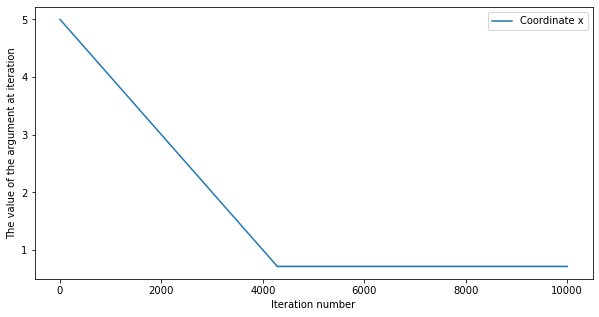

In [11]:
history = get_min_with_gd(5, df, lr=0.001, n_iter=10000)
plt.figure(figsize=(10, 5))
plt.plot(history)
plt.xlabel('Iteration number')
plt.ylabel('The value of the argument at iteration')
plt.legend(['Coordinate x', 'Coordinate y'])
plt.show()

#### 2.3. (3 points)

Plot the graph of the function once again. On this graph, plot the movement of the algorithm from the initial points to the final point in different colors. Mark the true minimum on the graph with a separate point and label it (as text on the graph).

100%|██████████| 10000/10000 [00:00<00:00, 85685.83it/s]


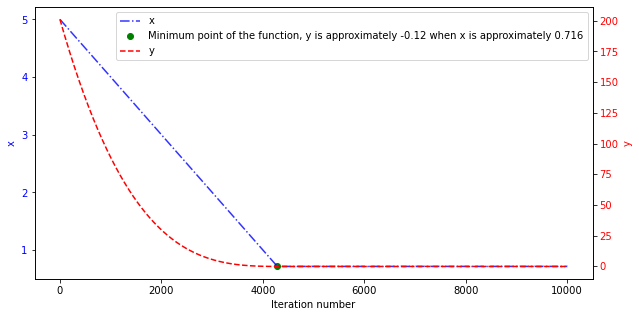

In [12]:
history = get_min_with_gd(5, df, lr=0.001, n_iter=10000)
y_coordinates = list(map(lambda x: f(x), history))

min_idx = np.argmin(y_coordinates)
min_x = history[min_idx]
min_y = y_coordinates[min_idx]

fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.plot(history, color='blue', label='x', alpha = 0.8, linestyle='-.')
ax1.set_xlabel('Iteration number')
ax1.set_ylabel('x', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(y_coordinates, color='red', label='y', linestyle='--')
ax2.set_ylabel('y', color='red')
ax2.tick_params(axis='y', labelcolor='red')

ax1.scatter(min_idx, min_x, color='green', label = 'Minimum point of the function, y is approximately -0.12 when x is approximately 0.716')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')
plt.show()

### Task 3

Starting from Task 3, we will work with other functions.

Let

$$f = \log((e^x + e^{-2x}) \cdot(e^{y + 1} + 0.5 \cdot e^{-y}))$$


#### 3.1. (1 point and 2 bonus points)

Is it true that $ f $ has a unique point of local minimum, and that this local minimum is also global? Why or why not? Prove your answer!

*Note: In this task, a graphical proof is worth 1 point; a rigorous mathematical proof is worth 2 bonus points.*

In [56]:
# From calculus we know that log (x*y) is equal to log(x) + log(y), so we can rewrite the function:
def f(xy):
    x = xy[0]
    y = xy[1]
    return (np.log(np.exp(x) + np.exp(-2 * x))) + (np.log(np.exp(y + 1) + 0.5 * np.exp(-y)))

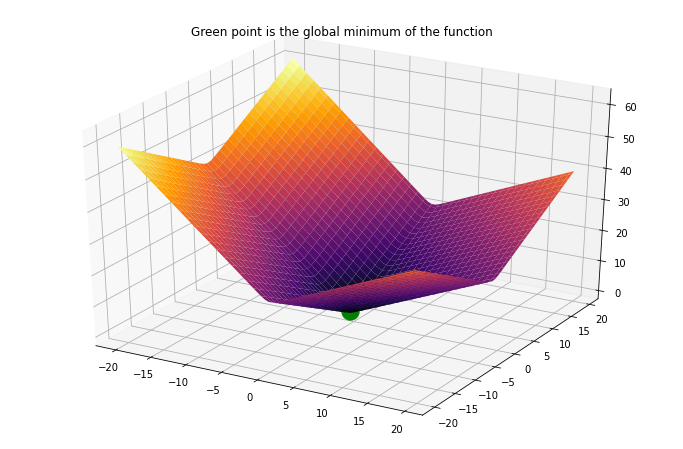

In [57]:
# Next let's try to plot the function and visually confirm the existence of global and local minimums:
u, v = np.mgrid[-20:20:0.5, -20:20:0.5]
z = f([u, v])

min_idx = np.argmin(z)  
min_z = np.min(z)  
u_min = u[np.unravel_index(min_idx, z.shape)]
v_min = v[np.unravel_index(min_idx, z.shape)]

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(u, v, z, cmap='inferno')
ax.scatter(u_min, v_min, min_z, color='green', s = 300)
plt.title('Green point is the global minimum of the function')

fig.show()

#### 3.2. (3 points and 2 bonus points)

Come up with some functions $ g $ and $ h $ of two variables such that
- the function $ g $ has no global minimum (not bounded below);
- the function $ h $ has at least two local minima that are not equal to each other.

Prove that your functions satisfy the stated criteria.

*Note: In this task, a graphical proof is evaluated within the main points; a rigorous mathematical proof is worth 2 bonus points.*

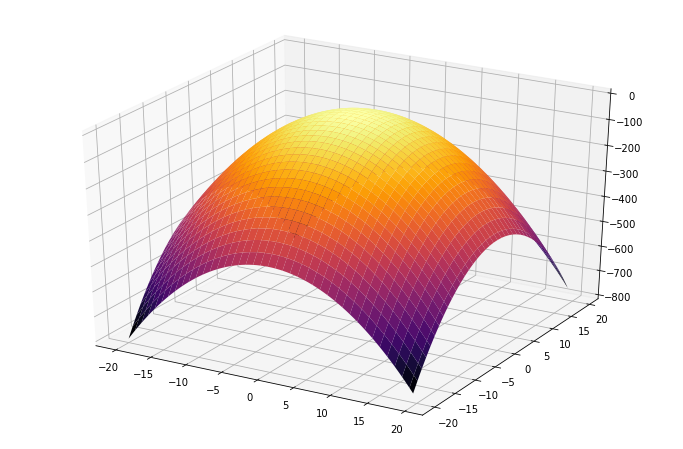

In [16]:
# First let's try with a function g that is not bounded below
# The function -(x ** 2) -  (y ** 2) is steadily decreasing, hence it does not have a global minimum, only a global maximum which is a point x = 0 and y =0, because derivative of 
# g(x) is -2x - 2y, the farther we move away from zero, the smaller function becomes, so there is no bound 
def g(xy):
    x = xy[0]
    y = xy[1]
    return -(x ** 2) -  (y ** 2)

u, v = np.mgrid[-20:20:0.5, -20:20:0.5]
z = g([u, v])

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(u, v, z, cmap='inferno')

fig.show()

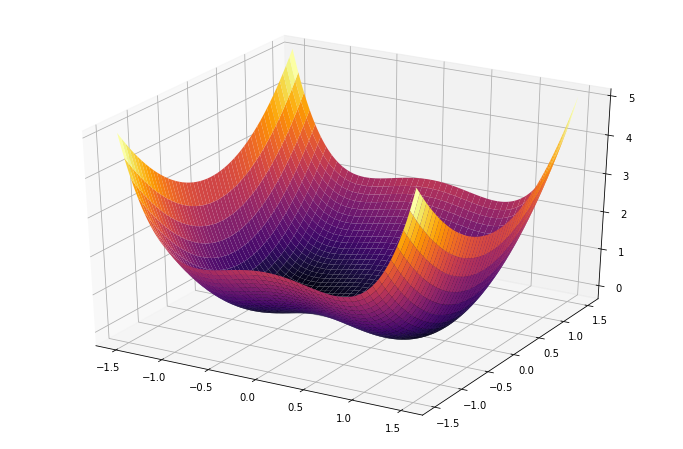

In [42]:
# Now let's move to a task to find some function with two local minimums that are not equal
# Here is my thought process: previously we had a simple function with squares of x and y that was always decreasing, now i tested adding many different additional
# variables to make a function have different local minimums, i tried adding cubed values of x and y etc, and then eventually came to this:
def h(xy):
    x = xy[0]
    y = xy[1]
    return (x ** 4) +  (y ** 2) - (x ** 2) 
u, v = np.mgrid[-1.5:1.5:0.001, -1.5:1.5:0.001]
z = h([u, v])


fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(u, v, z, cmap='inferno')

fig.show()

#### 3.3. (5 points)

Implement the function `get_min_with_rmsprop` that takes the initial point $ x_0 $, the number of steps, `lr`, `beta`, and `threshold`; performs gradient descent with RMSProp modification to find the minimum; and returns the sequence of points obtained at each step.

Here are the formulas for this algorithm:

$$ g^{n+1} = ∇f(w^{n}) $$
$$ \gamma^{n+1} = (1 - \beta) \gamma^{n} + \beta (g^{n+1})^2 $$
$$ w^{n+1} = w^n - \frac{\alpha}{\sqrt{\gamma^{n+1} + ɛ}}⋅g^{n+1} $$

Here, $ α $ is the learning rate, $ ɛ $ is a small number (0.0001 can be used to avoid division by zero), and $ beta $ is the momentum term(measure of inertia).



In [112]:
def get_min_with_rmsprop(w0, func_grad, beta=0.01, alpha=0.01, epsilon=0.0001, n_iter=150):
    """
    args:
        - w0 - initial vector of function arguments (initial approximation, starting point)
        - func_grad - function gradient (a Python function that takes coordinates as input and calculates the gradient from them)
        - alpha - learning rate (learning step)
        - n_iter - number of iterations in gradient descent
    """
    w = np.array(w0)
    gamma = 0
    history = [w]

    for i in tqdm(range(n_iter)):
      w = history[-1]
      # print(f'w is {w}')
      grad = func_grad(w)
      # print(f'grad is {grad}')
      gamma = (1-beta) * gamma + beta * (grad)**2
      # print(f'gamma is {gamma}')
      w_new = w - (alpha * grad)/(np.sqrt(gamma + epsilon))
      # print(f'w_new is {w_new}')
      history.append(w_new)

    return np.array(history)

#### 3.4. (4 points)

Run the search for the minimum for all three functions ($f$, $g$, $h$) from several arbitrary points (at least 3, resulting in at least 9 runs).

Check that everything works as expected by plotting the graph of the coordinates of the point (2D graph) as it progresses through gradient descent for each run. All graphs should be plotted on three pairs of axes, arranged vertically on one canvas (separate axes for each function; different runs for one function should be displayed on the same axes).

#### 1) f(x,y)

In [113]:
# Let's start with function f(x,y), we need to define the gradient function for it:
def grad_f(xy):
    x = xy[0]
    y = xy[1]
    return np.array([(np.exp(x) - 2 * np.exp(-2*x))/(np.exp(x) + np.exp(-2*x)), (np.exp(y + 1) - 0.5 * np.exp(-y))/(np.exp(y + 1) + 0.5 * np.exp(-y))])

In [139]:
get_min_with_rmsprop([-20,20], grad_f, beta=0.01, alpha=0.01, epsilon=0.0001, n_iter=100000)[-1]

100%|██████████| 100000/100000 [00:02<00:00, 40836.03it/s]


array([ 0.23104906, -0.84657359])

In [138]:
get_min_with_rmsprop([10,10], grad_f, beta=0.01, alpha=0.01, epsilon=0.0001, n_iter=100000)[-1]

100%|██████████| 100000/100000 [00:02<00:00, 39020.35it/s]


array([ 0.23104906, -0.84657359])

In [140]:
get_min_with_rmsprop([1,1], grad_f, beta=0.01, alpha=0.01, epsilon=0.0001, n_iter=100000)[-1]

100%|██████████| 100000/100000 [00:02<00:00, 40480.21it/s]


array([ 0.23104906, -0.84657359])

#### 2) g(x,y), i don't think I can get a proper minimum here because function is not bounded from below

In [123]:
# Let's start with function g(x,y), we need to define the gradient function for it:
def grad_g(xy):
    x = xy[0]
    y = xy[1]
    return np.array([-2 * x, 2 * y])

In [135]:
get_min_with_rmsprop([-20, 20], grad_g, beta=0.01, alpha=0.01, epsilon=0.0001, n_iter=100000)[-1]

100%|██████████| 100000/100000 [00:01<00:00, 96521.52it/s]


array([-1.02506997e+003,  5.99546966e-291])

In [136]:
get_min_with_rmsprop([10, 10], grad_g, beta=0.01, alpha=0.01, epsilon=0.0001, n_iter=100000)[-1]

100%|██████████| 100000/100000 [00:01<00:00, 93357.58it/s]


array([1.01568670e+003, 7.52878534e-292])

In [137]:
get_min_with_rmsprop([1, 1], grad_g, beta=0.01, alpha=0.01, epsilon=0.0001, n_iter=100000)[-1]

100%|██████████| 100000/100000 [00:01<00:00, 93268.13it/s]


array([1.00827598e+003, 3.00891938e-290])

#### 3) h(x,y)

In [124]:
# Let's start with function g(x,y), we need to define the gradient function for it:
def grad_h(xy):
    x = xy[0]
    y = xy[1]
    return np.array([4 * (x ** 3) -2 * x, 2 * y])

In [126]:
get_min_with_rmsprop([-20, 20], grad_h, beta=0.01, alpha=0.01, epsilon=0.0001, n_iter=100000)[-1]

100%|██████████| 100000/100000 [00:01<00:00, 83762.58it/s]


array([-7.02737099e-001,  5.99546966e-291])

In [133]:
get_min_with_rmsprop([10, 10], grad_h, beta=0.01, alpha=0.01, epsilon=0.0001, n_iter=100000)[-1]

100%|██████████| 100000/100000 [00:01<00:00, 86224.95it/s]


array([7.11396920e-001, 7.52878534e-292])

In [128]:
get_min_with_rmsprop([1, 1], grad_h, beta=0.01, alpha=0.01, epsilon=0.0001, n_iter=100000)[-1]

100%|██████████| 100000/100000 [00:01<00:00, 85593.57it/s]


array([7.02737099e-001, 3.00891938e-290])

#### 3.5. (3 points)

Plot the graphs of the functions again. On these graphs, plot the movement of the algorithm from the initial points to the final point in different colors. Where the functions have them, mark the true local minima on the graphs as separate points, and label them with text on the graph. All graphs should be plotted on three sets of axes, arranged vertically on one canvas—separate axes for each function.

In [154]:
history_f = get_min_with_rmsprop([-20,20], grad_f, beta=0.01, alpha=0.01, epsilon=0.0001, n_iter=100000)
history_g = get_min_with_rmsprop([-20,20], grad_g, beta=0.01, alpha=0.01, epsilon=0.0001, n_iter=100000)
history_h = get_min_with_rmsprop([-20,20], grad_h, beta=0.01, alpha=0.01, epsilon=0.0001, n_iter=100000)

100%|██████████| 100000/100000 [00:01<00:00, 96134.96it/s]


In [158]:
u, v = np.mgrid[-20:20:0.5, -20:20:0.5]
z_f = f([u, v])
z_g = g([u, v])
z_h = h([u, v])

In [169]:
min_idx_f = np.argmin(z_f)  
min_z_f = np.min(z_f)  
u_min_f = u[np.unravel_index(min_idx_f, z_f.shape)]
v_min_f = v[np.unravel_index(min_idx_f, z_f.shape)]

min_idx_g = np.argmin(z_g)  
min_z_g = np.min(z_g)  
u_min_g = u[np.unravel_index(min_idx_g, z_g.shape)]
v_min_g = v[np.unravel_index(min_idx_g, z_g.shape)]

min_idx_h = np.argmin(z_h)  
min_z_h = np.min(z_h)  
u_min_h = u[np.unravel_index(min_idx_h, z_h.shape)]
v_min_h = v[np.unravel_index(min_idx_h, z_h.shape)]

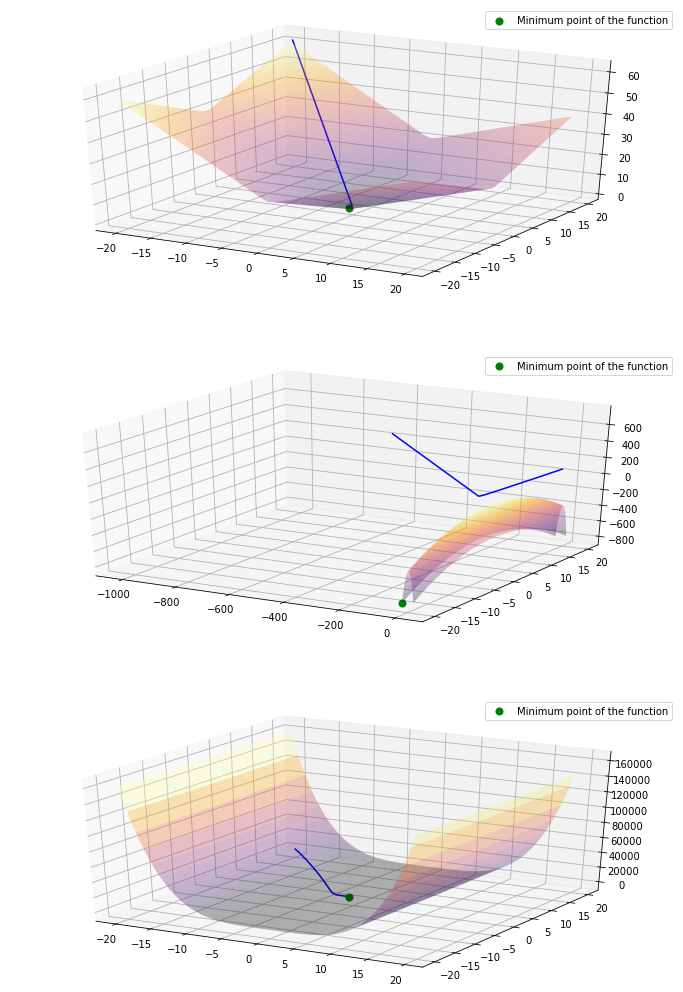

In [171]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 18), subplot_kw={'projection': '3d'})

ax1.plot_surface(u, v, z_f, cmap='inferno', alpha=0.3)
ax2.plot_surface(u, v, z_g, cmap='inferno', alpha=0.3)
ax3.plot_surface(u, v, z_h, cmap='inferno', alpha=0.3)


ax1.plot(history_f[:, 0], history_f[:, 1], f([history_f[:, 0], history_f[:, 1]]), color='blue')
ax1.scatter(u_min_f, v_min_f, min_z_f, color='green', s = 50, label = 'Minimum point of the function')
ax1.legend(loc='upper right')

ax2.plot(history_g[:, 0], history_g[:, 1], f([history_g[:, 0], history_g[:, 1]]), color='blue')
ax2.scatter(u_min_g, v_min_g, min_z_g, color='green', s = 50, label = 'Minimum point of the function')
ax2.legend(loc='upper right')

ax3.plot(history_h[:, 0], history_h[:, 1], f([history_h[:, 0], history_h[:, 1]]), color='blue')
ax3.scatter(u_min_h, v_min_h, min_z_h, color='green', s = 50, label = 'Minimum point of the function')
ax3.legend(loc='upper right')

fig.show()

### Task 4

#### Scaling to Multidimensional Case (4 points)

Ensure that your `get_min_with_rmsprop` function from the previous task works not only with functions of two variables but also with functions of an arbitrary number of variables. Make any necessary adjustments to the function below.

Devise any function of 5 variables that has some minimum (for example, the simplest point $(0, 0, 0, 0, 0)$) and run gradient descent with RMSProp for this function. Verify that the gradient descent indeed converges to the correct extremum point.

In [179]:
# I hope I understood this task correctly, because it just seems to be too easy for 4 points, 
# because I only changed the gradient function to have 5 variables for the simplest function of
# x^2 + y^2 + z^2 + i^2 + j^2 which reaches minimum at (0,0,0,0,0). 
# I didn't even have to change get_min_with_rmsprop function
def get_min_with_rmsprop(w0, func_grad, beta=0.01, alpha=0.01, epsilon=0.0001, n_iter=150):
    w = np.array(w0)
    gamma = np.zeros_like(w)
    history = [w]

    for i in tqdm(range(n_iter)):
        w = history[-1]
        grad = func_grad(w)
        gamma = (1 - beta) * gamma + beta * (grad ** 2)
        w_new = w - (alpha * grad) / (np.sqrt(gamma + epsilon))
        history.append(w_new)

    return np.array(history)

# Let's start with function g(x,y), we need to define the gradient function for it:
def grad_g(xyzij):
    x = xyzij[0]
    y = xyzij[1]
    z = xyzij[2]
    i = xyzij[3]
    j = xyzij[4]
    return np.array([2 * x, 2 * y, 2 * z, 2 * i, 2 * j])

In [184]:
# The end result is zeroes, 7.52878534e-292 is such a small number that its basically zero
get_min_with_rmsprop([10,10,10,10,10], grad_g, beta=0.01, alpha=0.01, epsilon=0.0001, n_iter=100000)[-1]

100%|██████████| 100000/100000 [00:01<00:00, 85029.73it/s]


array([7.52878534e-292, 7.52878534e-292, 7.52878534e-292, 7.52878534e-292,
       7.52878534e-292])